In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import load_model

In [2]:
# Load the data
data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [3]:
print(data.head())

       eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0   

In [4]:
print(data.isnull().sum())

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64


In [5]:
print(data.dtypes)

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object


In [6]:
# Convert 'expert_consensus' to a categorical type
data['expert_consensus'] = data['expert_consensus'].astype('category')

# Assign encoded variable back to data['expert_consensus']
data['expert_consensus'] = data['expert_consensus'].cat.codes

In [7]:
print(data.dtypes)

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                       int8
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object


In [8]:
# Convert 'expert_consensus' to int64
data['expert_consensus'] = data['expert_consensus'].astype('int64')

In [9]:
print(data.dtypes)

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                      int64
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object


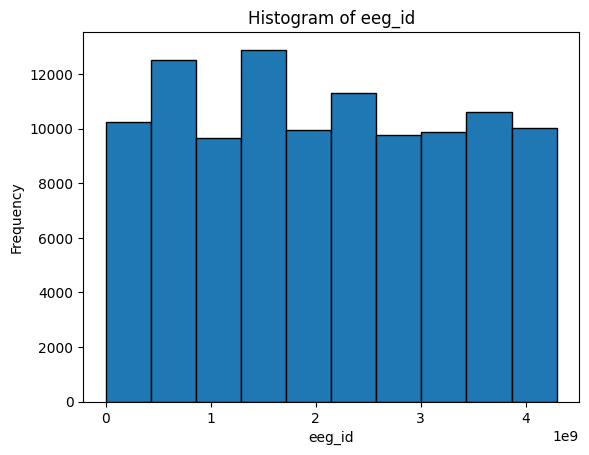

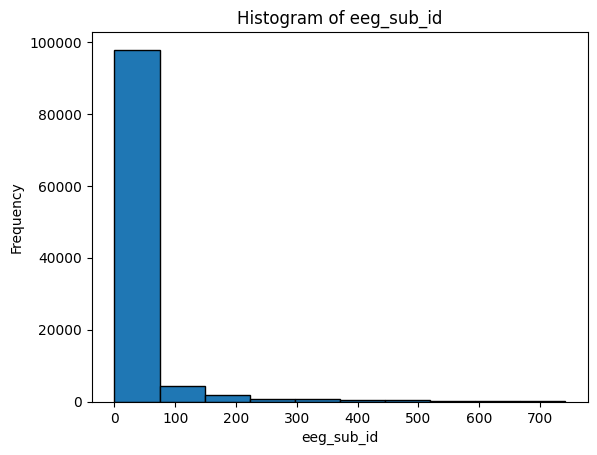

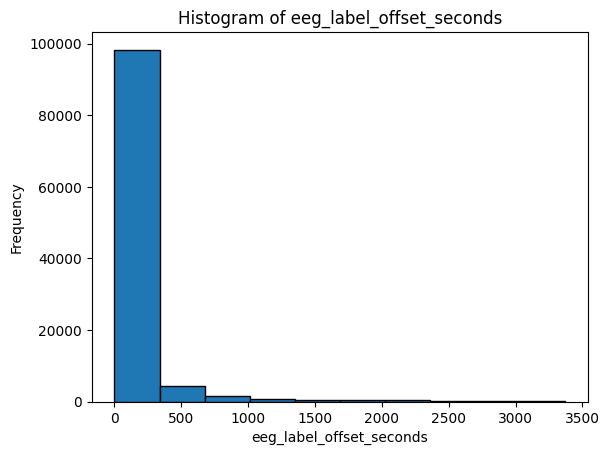

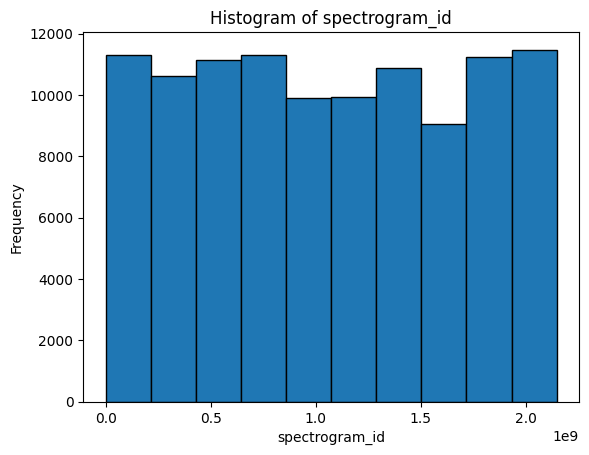

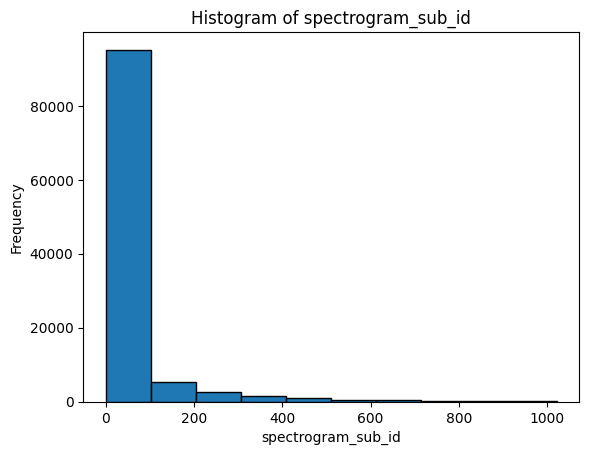

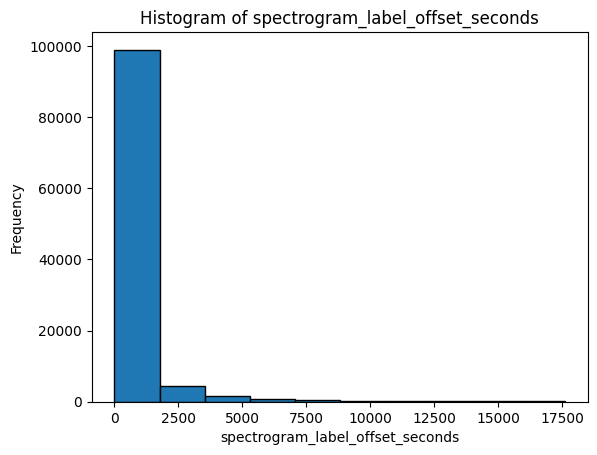

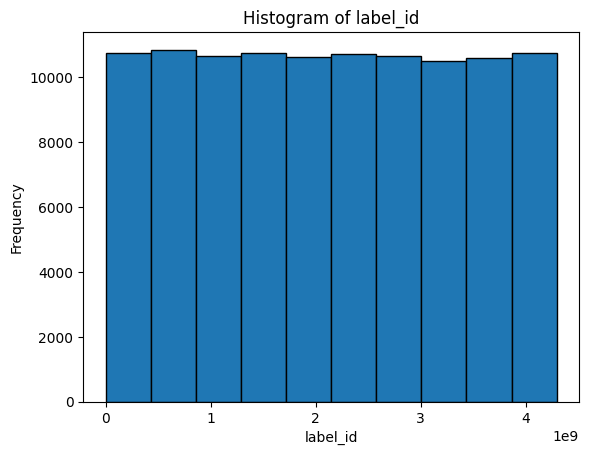

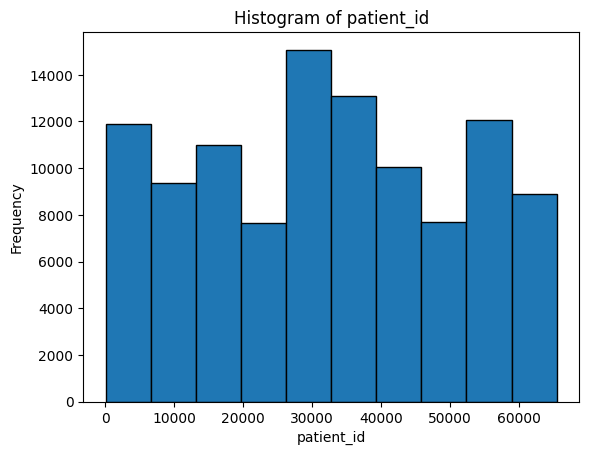

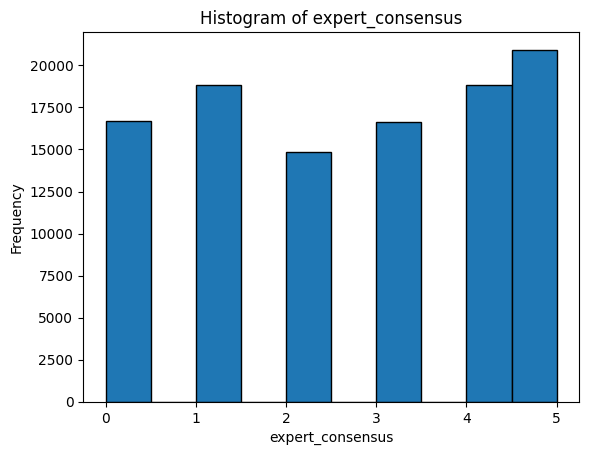

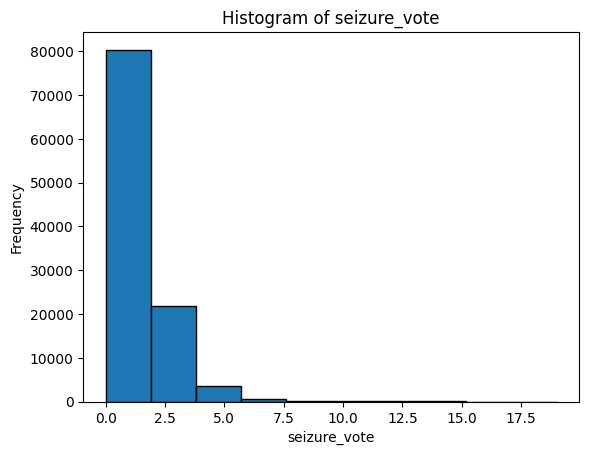

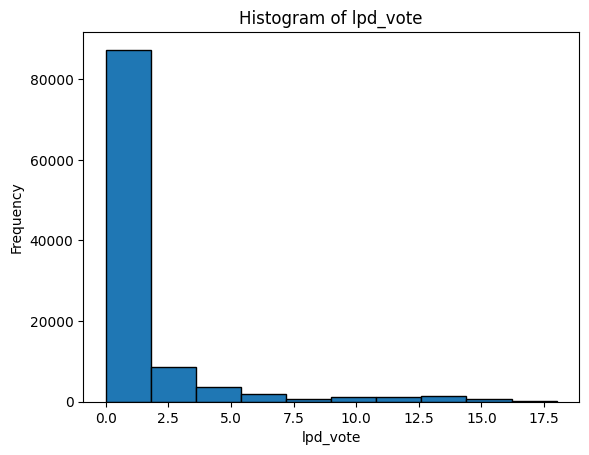

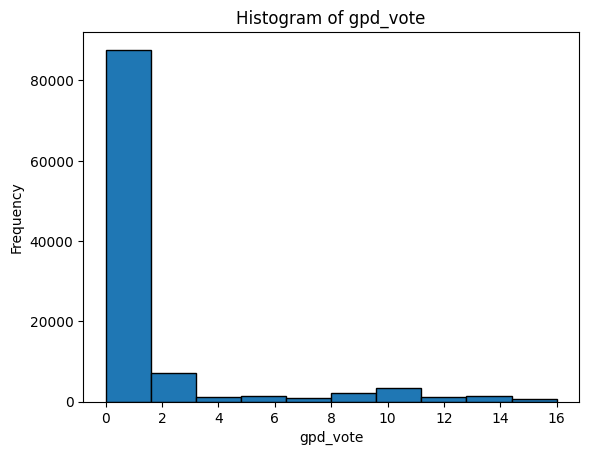

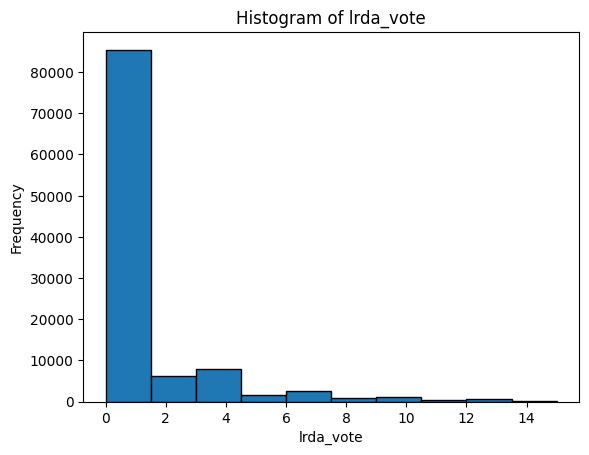

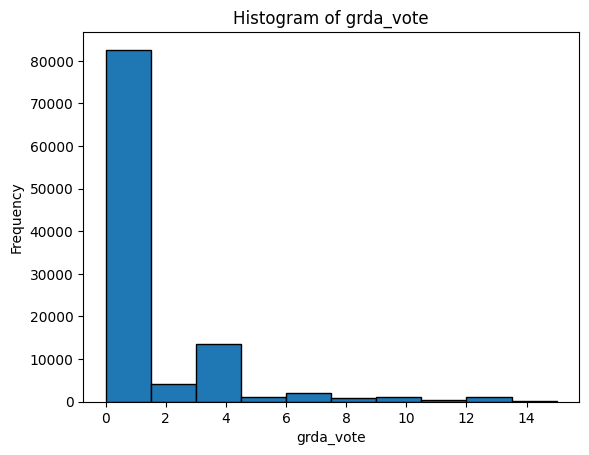

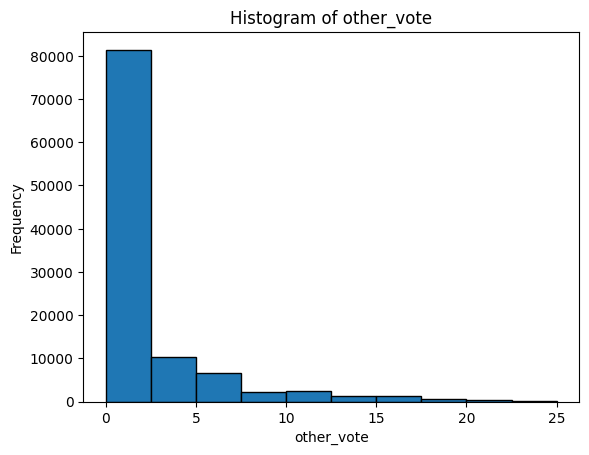

In [10]:
# Loop through all columns in the DataFrame
for column in data.columns:
    # Check if the column is of a numerical data type
    if data[column].dtype in ['int64', 'float64']:
        # Create a histogram for the column
        plt.hist(data[column], bins=10, edgecolor='black')
        
        # Add a title and labels
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Show the plot
        plt.show()

In [11]:
# Prepare the data
X = data.drop('expert_consensus', axis=1)
y = data['expert_consensus']

In [12]:
# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (85440, 14)
y_train shape: (85440,)
X_test shape: (21360, 14)
y_test shape: (21360,)


In [15]:
model = Sequential()

# Input layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layer 1
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layer 2
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layer 3
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7680      
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [16]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
2670/2670 [==============================] - 34s 12ms/step - loss: 3.6311 - accuracy: 0.1838 - val_loss: 1.9033 - val_accuracy: 0.1895
Epoch 2/30
2670/2670 [==============================] - 31s 12ms/step - loss: 1.9218 - accuracy: 0.1861 - val_loss: 1.9331 - val_accuracy: 0.1874
Epoch 3/30
2670/2670 [==============================] - 32s 12ms/step - loss: 1.9132 - accuracy: 0.1893 - val_loss: 1.8938 - val_accuracy: 0.1957
Epoch 4/30
2670/2670 [==============================] - 31s 12ms/step - loss: 1.8890 - accuracy: 0.1914 - val_loss: 1.8920 - val_accuracy: 0.1817
Epoch 5/30
2670/2670 [==============================] - 31s 12ms/step - loss: 1.8709 - accuracy: 0.1936 - val_loss: 1.8669 - val_accuracy: 0.1948
Epoch 6/30
2670/2670 [==============================] - 31s 12ms/step - loss: 1.8560 - accuracy: 0.1935 - val_loss: 1.8547 - val_accuracy: 0.1942
Epoch 7/30
2670/2670 [==============================] - 31s 11ms/step - loss: 1.8458 - accuracy: 0.1953 - val_loss: 1.8392 -

In [17]:
# Save the model
model.save('my_model1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


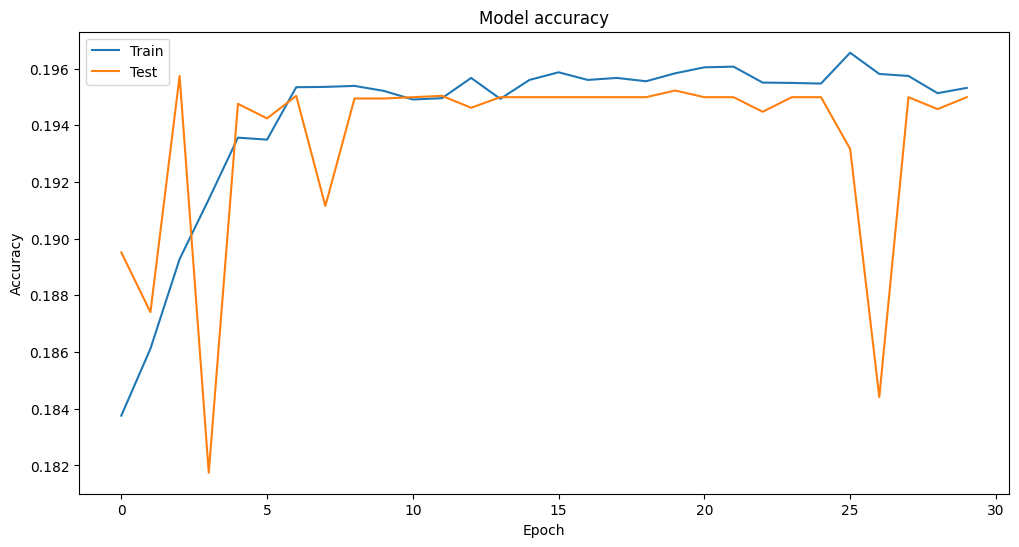

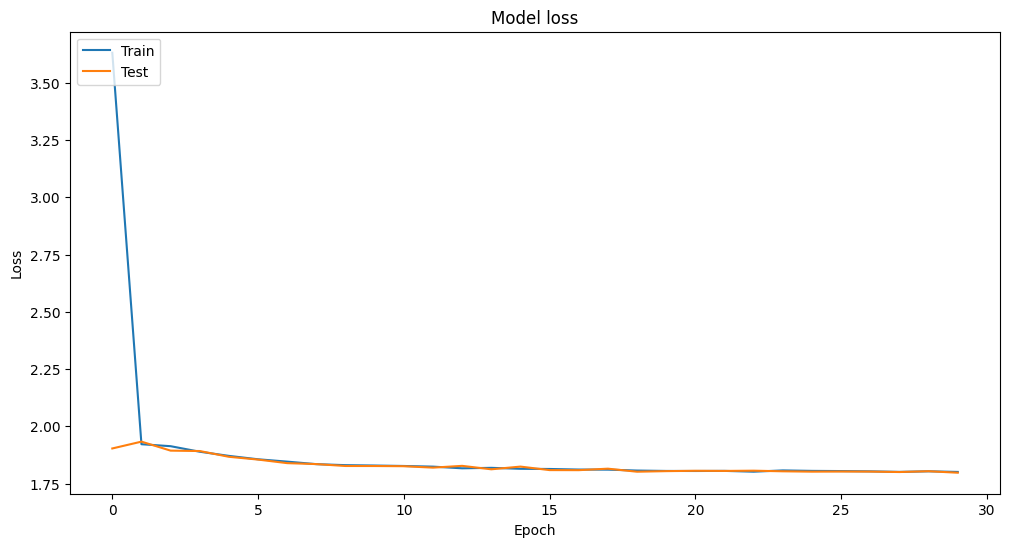

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
# Load the model from disk
model = load_model('/kaggle/working/my_model1.h5')

In [20]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

668/668 [==============================] - 2s 3ms/step


In [21]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

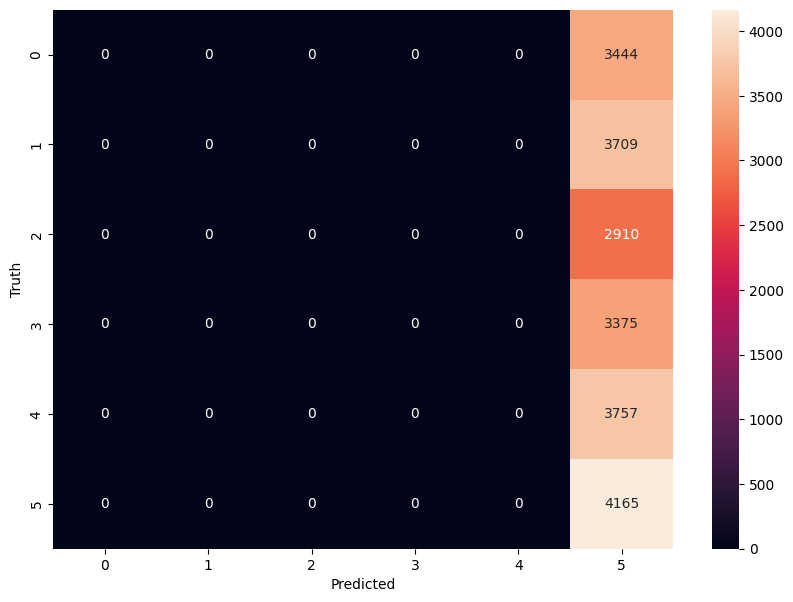

In [22]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [23]:
# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.19499063670411984


In [24]:
# Predict the classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Select 10 random indices
random_indices = np.random.choice(range(len(y_test)), 10)

# Map the class indices to the actual class labels
class_labels = {i: label for i, label in enumerate(encoder.classes_)}

# Check actual class and predicted class for the randomly selected instances
for i in random_indices:
    actual_class = class_labels[y_test[i]]
    predicted_class = class_labels[y_pred_classes[i]]
    print(f"Instance {i+1}: Actual Class - {actual_class}, Predicted Class - {predicted_class}")

668/668 [==============================] - 2s 3ms/step
Instance 16252: Actual Class - 2, Predicted Class - 5
Instance 11065: Actual Class - 4, Predicted Class - 5
Instance 21349: Actual Class - 1, Predicted Class - 5
Instance 14079: Actual Class - 3, Predicted Class - 5
Instance 8543: Actual Class - 3, Predicted Class - 5
Instance 18990: Actual Class - 2, Predicted Class - 5
Instance 2864: Actual Class - 3, Predicted Class - 5
Instance 13187: Actual Class - 4, Predicted Class - 5
Instance 529: Actual Class - 1, Predicted Class - 5
Instance 3347: Actual Class - 5, Predicted Class - 5
